<a href="https://colab.research.google.com/github/jgbrenner/psychometrics/blob/main/Analiza_wynikow_testuC9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Wstęp**

Ten notebook Colab analizuje odpowiedzi na kwestionariusz zaprojektowany do pomiaru **perfekcjonizmu** w trzech odrębnych wymiarach:

1. **Perfekcjonizm skierowany na siebie (PSS)**:
   - Tendencja do stawiania sobie wysokich wymagań i dążenia do perfekcji.
2. **Perfekcjonizm skierowany na innych (PSI)**:
   - Stawianie wysokich oczekiwań wobec innych i krytyczna ocena ich osiągnięć.
3. **Perfekcjonizm przypisywany społecznie (PSP)**:
   - Przekonanie, że inni oczekują od nas perfekcji.

### **Cel analizy**
Głównym celem analizy jest ocena rzetelności i trafności kwestionariusza, analiza statystyk zarówno na poziomie pozycji, jak i skal, a także eksploracja powiązań demograficznych. Kluczowe zadania obejmują:
- Obliczenie statystyk opisowych dla pozycji testowych.
- Ocenę spójności wewnętrznej kwestionariusza i podskal za pomocą alfa Cronbacha.
- Analizę mocy dyskryminacyjnych poszczególnych pozycji (korelacje pozycja-całość).
- Test zgodności pomiędzy wymiarami za pomocą tau Kendalla.
- Analizę zależności między perfekcjonizmem a zmiennymi demograficznymi (płeć i wiek).

### **Opis zbioru danych**
- Zbiór danych obejmuje **95 poprawnych odpowiedzi** po czyszczeniu danych.
- Kwestionariusz składa się z **18 pozycji** ocenianych na 5-punktowej skali Likerta (1 = Zdecydowanie się nie zgadzam, 5 = Zdecydowanie się zgadzam).
- Dwie zmienne demograficzne:
  - **Płeć**: Zakodowana jako 0 (Mężczyzna) i 1 (Kobieta).
  - **Wiek**: Wartości liczbowe w zakresie od 16 do 59 lat.

### **Narzędzia użyte w analizie**
- **Biblioteki Python**: `pandas`, `numpy`, `scipy`, `pingouin`.
- Wykorzystane metody statystyczne:
  - Alfa Cronbacha do oceny rzetelności.
  - Korelacja Pearsona do analizy mocy dyskryminacyjnych i związku z wiekiem.
  - Tau Kendalla do oceny zgodności pomiędzy wymiarami.
  - Test t do analizy różnic ze względu na płeć.

Notebook dostarcza wglądu w właściwości psychometryczne kwestionariusza oraz identyfikuje potencjalne obszary do poprawy, takie jak pozycje o niskiej mocy dyskryminacyjnej.

\

In [ ]:
!pip install pingouin


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import kendalltau, pearsonr, ttest_ind
from pingouin import cronbach_alpha
import re
from scipy.stats import kendalltau

# **Import pliku .csv z wynikami kwestionariusza**

In [ ]:
#Import CSV file
from google.colab import files
uploaded = files.upload()

Saving Kwestionariusz Perfekcjonizmu C9.csv to Kwestionariusz Perfekcjonizmu C9.csv


In [ ]:
# Load the CSV file
data = pd.read_csv("Kwestionariusz Perfekcjonizmu C9.csv")

# Print the first few rows to inspect the data
print("Preview of the dataset:")
print(data.head())

# Print column names for verification
print("\nColumn names in the dataset:")
print(data.columns.tolist())


Preview of the dataset:
                     Timestamp Zaznacz swoją płeć biologiczną:  \
0  2024/11/24 4:52:32 PM GMT+1                             NaN   
1  2024/11/24 4:56:25 PM GMT+1                             NaN   
2  2024/11/24 4:57:17 PM GMT+1                             NaN   
3  2024/11/24 5:13:05 PM GMT+1                             NaN   
4  2024/12/02 9:24:36 PM GMT+1                             NaN   

   Podaj swój wiek  1. Czuję, że muszę być doskonały we wszystkim, co robię.  \
0              NaN                                                  5          
1              NaN                                                  5          
2              NaN                                                  5          
3              NaN                                                  4          
4              NaN                                                  3          

   2. Gdy nie osiągam swoich wysokich standardów, czuję się zawiedziony/a.  \
0                   

In [ ]:


# Clean column names
data.columns = [re.sub(r'\s+', ' ', col).strip() for col in data.columns]

# Print cleaned column names for verification
print("\nCleaned column names:")
print(data.columns.tolist())



Cleaned column names:
['Timestamp', 'Zaznacz swoją płeć biologiczną:', 'Podaj swój wiek', '1. Czuję, że muszę być doskonały we wszystkim, co robię.', '2. Gdy nie osiągam swoich wysokich standardów, czuję się zawiedziony/a.', '3. Nawet drobne błędy wywołują u mnie silny dyskomfort.', '4. Czuję, że muszę być lepszy od innych, aby móc się czuć spełniony.', '5. Porównuję się z innymi, aby ocenić swoje osiągnięcia.', '6. Uważam, że nie mogę sobie pozwolić na porażkę.', '7. Oczekuję, że inni będą wykonywać swoje zadania perfekcyjnie.', '8. Krytycznie oceniam osiągnięcia innych ludzi.', '9. Czuję, że inni mogą zrobić coś lepiej niż to zrobili.', '10. Nie toleruję błędów popełnianych przez innych.', '11. Czuję się sfrustrowany, gdy inni nie spełniają moich oczekiwań.', '12. Wyrażam swoje niezadowolenie z pracy innych.', '13. Czuję, że inni oczekują ode mnie doskonałości.', '14. Mam wrażenie, że muszę spełniać wysokie oczekiwania innych.', '15. Czuję presję, aby być idealnym w oczach innych.',

In [ ]:
# Define item columns explicitly
item_columns = [
    '1. Czuję, że muszę być doskonały we wszystkim, co robię.',
    '2. Gdy nie osiągam swoich wysokich standardów, czuję się zawiedziony/a.',
    '3. Nawet drobne błędy wywołują u mnie silny dyskomfort.',
    '4. Czuję, że muszę być lepszy od innych, aby móc się czuć spełniony.',
    '5. Porównuję się z innymi, aby ocenić swoje osiągnięcia.',
    '6. Uważam, że nie mogę sobie pozwolić na porażkę.',
    '7. Oczekuję, że inni będą wykonywać swoje zadania perfekcyjnie.',
    '8. Krytycznie oceniam osiągnięcia innych ludzi.',
    '9. Czuję, że inni mogą zrobić coś lepiej niż to zrobili.',
    '10. Nie toleruję błędów popełnianych przez innych.',
    '11. Czuję się sfrustrowany, gdy inni nie spełniają moich oczekiwań.',
    '12. Wyrażam swoje niezadowolenie z pracy innych.',
    '13. Czuję, że inni oczekują ode mnie doskonałości.',
    '14. Mam wrażenie, że muszę spełniać wysokie oczekiwania innych.',
    '15. Czuję presję, aby być idealnym w oczach innych.',
    '16. Obawiam się, że zawiodę oczekiwania innych.',
    '17. Czuję, że muszę udowodnić swoją wartość innym.',
    '18. Myślę o tym, co inni sądzą o moich osiągnięciach.'
]

# Compute descriptive statistics for test items
item_stats = data[item_columns].describe().T
print("\nDescriptive statistics for test items:")
print(item_stats)



Descriptive statistics for test items:
                                                    count      mean       std  \
1. Czuję, że muszę być doskonały we wszystkim, ...   95.0  3.442105  1.277596   
2. Gdy nie osiągam swoich wysokich standardów, ...   95.0  3.978947  0.978263   
3. Nawet drobne błędy wywołują u mnie silny dys...   95.0  3.715789  1.251919   
4. Czuję, że muszę być lepszy od innych, aby mó...   95.0  3.210526  1.328050   
5. Porównuję się z innymi, aby ocenić swoje osi...   95.0  3.610526  1.282407   
6. Uważam, że nie mogę sobie pozwolić na porażkę.    95.0  3.178947  1.254600   
7. Oczekuję, że inni będą wykonywać swoje zadan...   95.0  2.852632  1.320609   
8. Krytycznie oceniam osiągnięcia innych ludzi.      95.0  2.336842  1.199384   
9. Czuję, że inni mogą zrobić coś lepiej niż to...   95.0  3.073684  1.256829   
10. Nie toleruję błędów popełnianych przez innych.   95.0  2.052632  1.123903   
11. Czuję się sfrustrowany, gdy inni nie spełni...   95.0  3.147368  

In [ ]:
# Print all column names in the DataFrame to verify
print("Column names in the dataset:")
for col in data.columns:
    print(repr(col))



Column names in the dataset:
'1. Czuję, że muszę być doskonały we wszystkim, co robię.'
'2. Gdy nie osiągam swoich wysokich standardów, czuję się zawiedziony/a.'
'3. Nawet drobne błędy wywołują u mnie silny dyskomfort.'
'4. Czuję, że muszę być lepszy od innych, aby móc się czuć spełniony.'
'5. Porównuję się z innymi, aby ocenić swoje osiągnięcia.'
'6. Uważam, że nie mogę sobie pozwolić na porażkę.'
'7. Oczekuję, że inni będą wykonywać swoje zadania perfekcyjnie.'
'8. Krytycznie oceniam osiągnięcia innych ludzi.'
'9. Czuję, że inni mogą zrobić coś lepiej niż to zrobili.'
'10. Nie toleruję błędów popełnianych przez innych.'
'11. Czuję się sfrustrowany, gdy inni nie spełniają moich oczekiwań.'
'12. Wyrażam swoje niezadowolenie z pracy innych.'
'13. Czuję, że inni oczekują ode mnie doskonałości.'
'14. Mam wrażenie, że muszę spełniać wysokie oczekiwania innych.'
'15. Czuję presję, aby być idealnym w oczach innych.'
'16. Obawiam się, że zawiodę oczekiwania innych.'
'17. Czuję, że muszę udowo

In [ ]:
# Dynamically match item columns using partial names
item_columns = [col for col in data.columns if col.startswith(tuple(str(i) for i in range(1, 19)))]

# Print the matched item columns
print("\nMatched item columns:")
print(item_columns)



Matched item columns:
['1. Czuję, że muszę być doskonały we wszystkim, co robię.', '2. Gdy nie osiągam swoich wysokich standardów, czuję się zawiedziony/a.', '3. Nawet drobne błędy wywołują u mnie silny dyskomfort.', '4. Czuję, że muszę być lepszy od innych, aby móc się czuć spełniony.', '5. Porównuję się z innymi, aby ocenić swoje osiągnięcia.', '6. Uważam, że nie mogę sobie pozwolić na porażkę.', '7. Oczekuję, że inni będą wykonywać swoje zadania perfekcyjnie.', '8. Krytycznie oceniam osiągnięcia innych ludzi.', '9. Czuję, że inni mogą zrobić coś lepiej niż to zrobili.', '10. Nie toleruję błędów popełnianych przez innych.', '11. Czuję się sfrustrowany, gdy inni nie spełniają moich oczekiwań.', '12. Wyrażam swoje niezadowolenie z pracy innych.', '13. Czuję, że inni oczekują ode mnie doskonałości.', '14. Mam wrażenie, że muszę spełniać wysokie oczekiwania innych.', '15. Czuję presję, aby być idealnym w oczach innych.', '16. Obawiam się, że zawiodę oczekiwania innych.', '17. Czuję, że 

# **Obliczanie alfy Crohnbach'a**

In [ ]:
# Define item groups for dimensions
PSS_items = item_columns[:6]  # Items 1–6
PSI_items = item_columns[6:12]  # Items 7–12
PSP_items = item_columns[12:18]  # Items 13–18

# Calculate Cronbach's alpha for the full scale
alpha_full, _ = cronbach_alpha(data[item_columns])
print("\nCronbach's Alpha for the Full Scale:")
print(f"Alpha = {alpha_full:.3f}")

# Calculate Cronbach's alpha for each dimension
alpha_PSS, _ = cronbach_alpha(data[PSS_items])
alpha_PSI, _ = cronbach_alpha(data[PSI_items])
alpha_PSP, _ = cronbach_alpha(data[PSP_items])

print("\nCronbach's Alpha for Subscales:")
print(f"PSS (Items 1–6): Alpha = {alpha_PSS:.3f}")
print(f"PSI (Items 7–12): Alpha = {alpha_PSI:.3f}")
print(f"PSP (Items 13–18): Alpha = {alpha_PSP:.3f}")



Cronbach's Alpha for the Full Scale:
Alpha = 0.887

Cronbach's Alpha for Subscales:
PSS (Items 1–6): Alpha = 0.827
PSI (Items 7–12): Alpha = 0.838
PSP (Items 13–18): Alpha = 0.883


# **Obliczenie Mocy Dyskryminacyjnej**

In [ ]:
# Compute total score across all items
data['Total_Score'] = data[item_columns].sum(axis=1)

# Compute item-total correlations
discrimination_power = {
    item: pearsonr(data[item], data['Total_Score'])[0] for item in item_columns
}

# Print item-total correlations
print("\nDiscrimination power (item-total correlation):")
for item, correlation in discrimination_power.items():
    print(f"{item}: {correlation:.3f}")



Discrimination power (item-total correlation):
1. Czuję, że muszę być doskonały we wszystkim, co robię.: 0.626
2. Gdy nie osiągam swoich wysokich standardów, czuję się zawiedziony/a.: 0.565
3. Nawet drobne błędy wywołują u mnie silny dyskomfort.: 0.626
4. Czuję, że muszę być lepszy od innych, aby móc się czuć spełniony.: 0.636
5. Porównuję się z innymi, aby ocenić swoje osiągnięcia.: 0.585
6. Uważam, że nie mogę sobie pozwolić na porażkę.: 0.626
7. Oczekuję, że inni będą wykonywać swoje zadania perfekcyjnie.: 0.591
8. Krytycznie oceniam osiągnięcia innych ludzi.: 0.602
9. Czuję, że inni mogą zrobić coś lepiej niż to zrobili.: 0.502
10. Nie toleruję błędów popełnianych przez innych.: 0.508
11. Czuję się sfrustrowany, gdy inni nie spełniają moich oczekiwań.: 0.538
12. Wyrażam swoje niezadowolenie z pracy innych.: 0.273
13. Czuję, że inni oczekują ode mnie doskonałości.: 0.504
14. Mam wrażenie, że muszę spełniać wysokie oczekiwania innych.: 0.636
15. Czuję presję, aby być idealnym w ocza

# **Obliczenie Korelacji Tau Kendalla:**




In [ ]:


# Compute pairwise Kendall's tau correlations
tau_pss_psi, _ = kendalltau(data['PSS_Score'], data['PSI_Score'])
tau_pss_psp, _ = kendalltau(data['PSS_Score'], data['PSP_Score'])
tau_psi_psp, _ = kendalltau(data['PSI_Score'], data['PSP_Score'])

# Print results
print("\nKendall's Tau Correlations (Pairwise):")
print(f"PSS and PSI: tau = {tau_pss_psi:.3f}")
print(f"PSS and PSP: tau = {tau_pss_psp:.3f}")
print(f"PSI and PSP: tau = {tau_psi_psp:.3f}")


Kendall's Tau Correlations (Pairwise):
PSS and PSI: tau = 0.278
PSS and PSP: tau = 0.463
PSI and PSP: tau = 0.218


In [ ]:
# Map gender to binary values
gender_map = {'Mężczyzna': 0, 'Kobieta': 1}  # 0 for Male, 1 for Female
data['Gender'] = data['Zaznacz swoją płeć biologiczną:'].map(gender_map)

# Check if there are any unmapped values
print("\nUnique values in Gender column:")
print(data['Gender'].unique())



Unique values in Gender column:
[0 1]


# **Rozklac plci**


Gender Distribution:
Gender
1    80
0    15
Name: count, dtype: int64

Gender Percentages:
Gender
1    84.210526
0    15.789474
Name: proportion, dtype: float64


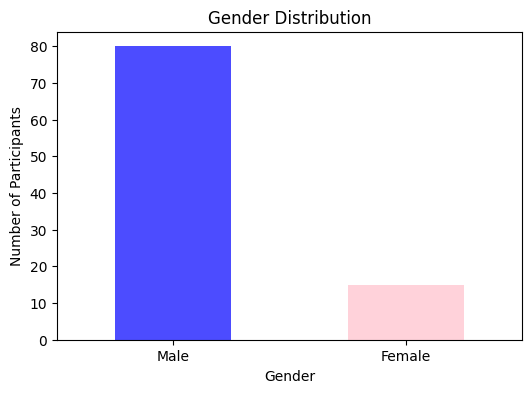

In [ ]:
# Calculate gender distribution
gender_counts = data['Gender'].value_counts()
gender_percentages = data['Gender'].value_counts(normalize=True) * 100

# Print gender distribution
print("\nGender Distribution:")
print(gender_counts)
print("\nGender Percentages:")
print(gender_percentages)

# Optional: Plot gender distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title("Gender Distribution")
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.ylabel("Number of Participants")
plt.xlabel("Gender")
plt.show()


In [ ]:
# Rename the age column for consistency
data['Age'] = data['Podaj swój wiek']

# Check for unique values in the Age column
print("\nUnique values in Age column:")
print(data['Age'].unique())



Unique values in Age column:
[24. 32. 39. 36. 59. 20. 21. 19. 23. 17. 22. 18. 34. 16. 27. 28. 42. 43.
 38. 55. 40. 26.]


# **Rozklad wieku**


Age Distribution Summary:
Minimum Age: 16.0
Maximum Age: 59.0
Mean Age: 24.03
Median Age: 23.0


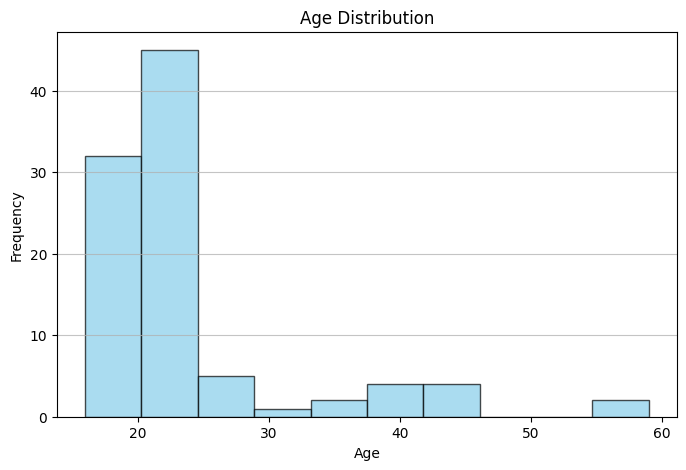

In [ ]:
# Calculate age distribution
age_min = data['Age'].min()
age_max = data['Age'].max()
age_mean = data['Age'].mean()
age_median = data['Age'].median()

print("\nAge Distribution Summary:")
print(f"Minimum Age: {age_min}")
print(f"Maximum Age: {age_max}")
print(f"Mean Age: {age_mean:.2f}")
print(f"Median Age: {age_median}")

# Plot age distribution
plt.figure(figsize=(8, 5))
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
# Correlation between age and total score
age_correlation, _ = pearsonr(data['Age'], data['Total_Score'])
print(f"\nCorrelation between Age and Total Score: r = {age_correlation:.3f}")



Correlation between Age and Total Score: r = -0.230


# **Podsumowanie Kluczowych Ustaleń**

## **Analiza Wiarygodności**

- **Alpha Cronbacha** dla pełnej skali i podskal wskazuje na doskonałą spójność wewnętrzną:
  - Pełna skala: **0.887**
  - Podskale:
    - **PSS (Perfekcjonizm skierowany na siebie)**: **0.827**
    - **PSI (Perfekcjonizm skierowany na innych)**: **0.838**
    - **PSP (Perfekcjonizm społecznie przypisywany)**: **0.883**

## **Moc Dyskryminacyjna**

- Większość pozycji ma silne korelacje item-total (**powyżej 0.5**), co wskazuje na ich dobre dopasowanie do konstruktu.
- Wyjątek stanowi pozycja **12** ("Wyrażam swoje niezadowolenie z pracy innych"), której korelacja item-total wynosi **r = 0.273**, co sugeruje słabą moc dyskryminacyjną.

## **Tau Kendalla**

- **PSS i PSP**: Tau Kendalla wynoszące **0.463** wskazuje na umiarkowaną pozytywną korelację między perfekcjonizmem skierowanym na siebie (PSS) a perfekcjonizmem społecznie przypisywanym (PSP).
- **PSS i PSI**: Tau wynoszące **0.278** sugeruje słabą do umiarkowanej pozytywną korelację między perfekcjonizmem skierowanym na siebie (PSS) a perfekcjonizmem skierowanym na innych (PSI).
- **PSI i PSP**: Tau wynoszące **0.218** wskazuje na słabą pozytywną korelację między perfekcjonizmem skierowanym na innych (PSI) a perfekcjonizmem społecznie przypisywanym (PSP).

**Interpretacja:** Wyniki są zgodne z teoretycznymi oczekiwaniami: wymiary perfekcjonizmu są pozytywnie powiązane, ale jednocześnie uchwytują różne aspekty konstruktu, co wskazuje na umiarkowane korelacje.

## **Analiza Demograficzna**

- **Płeć**: Brak istotnej różnicy w całkowitych wynikach perfekcjonizmu między mężczyznami a kobietami:
  - **t = -0.821**, **p = 0.414**
- **Wiek**: Obserwowano słabą ujemną korelację między wiekiem a całkowitym wynikiem perfekcjonizmu:
  - **r = -0.230**

---

### **Podsumowanie:**
Uzyskane wyniki sugerują, że kwestionariusz charakteryzuje się wysoką rzetelnością i spójnością wewnętrzną, przy czym wymiary perfekcjonizmu są pozytywnie powiązane, ale odrębne. Demografia (płeć i wiek) wydaje się mieć niewielki wpływ na całkowite wyniki perfekcjonizmu.
